<div align="center">
  <h2>Міністерство освіти і науки України</h2>
  <h2>Національний технічний університет України</h2>
  <h2>«Київський політехнічний інститут ім. Ігоря Сікорського»</h2>
  <h2>Факультет інформатики та обчислювальної техніки</h2>
  <h2>Кафедра обчислювальної техніки</h2>
  <br>
</div>

<div align="right">
    <br>
    <br>
<center>    
<h2>Лабораторна робота №4</h2>
</center>
    <br>
    <br>
    <br>
    <br>
    <br>
    <br>
    <br>
    <br>
Виконав: <br>
Студент ІІ курсу ФІОТ <br>
групи ІО-34 <br>
Рибачок Михайло Володимирович <br>
Номер у списку - 17 <br><br>

<center>
Київ - 2025
</center>

## Розв’язування задачі лінійної регресії 

## Мета лабораторної роботи: 
Навчитися працювати з простою моделлю лінійної регресії. 

# Практична реалізація: 
Відпрацювати на реальних даних послідовність дій, 
які є необхідними для вирішення задачі лінійної регресії. 

In [ ]:
# Завантаження датасету для Data Cleaning з kaggle для виконання лабораторної роботи
import kagglehub

# Download latest version
path = kagglehub.dataset_download("abhishek14398/salary-dataset-simple-linear-regression")

print("Path to dataset files:", path)

In [2]:
# Підкючення потрібних бібліотек
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# Перевірка датасету
# Читаємо весь наявний набір даних
data_origin = pd.read_csv("Salary_dataset.csv")
data_origin

,Unnamed: 0,YearsExperience,Salary
0,0,1.2,39344.0
1,1,1.4,46206.0
2,2,1.6,37732.0
3,3,2.1,43526.0
4,4,2.3,39892.0
5,5,3.0,56643.0
6,6,3.1,60151.0
7,7,3.3,54446.0
8,8,3.3,64446.0
9,9,3.8,57190.0


In [4]:
#Перевіряємо розмір, дані на відсутність
print(data_origin.shape)
data_origin.info()

(30, 3)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       30 non-null     int64  
 1   YearsExperience  30 non-null     float64
 2   Salary           30 non-null     float64
dtypes: float64(2), int64(1)
memory usage: 852.0 bytes


Text(0, 0.5, 'Зарплата')

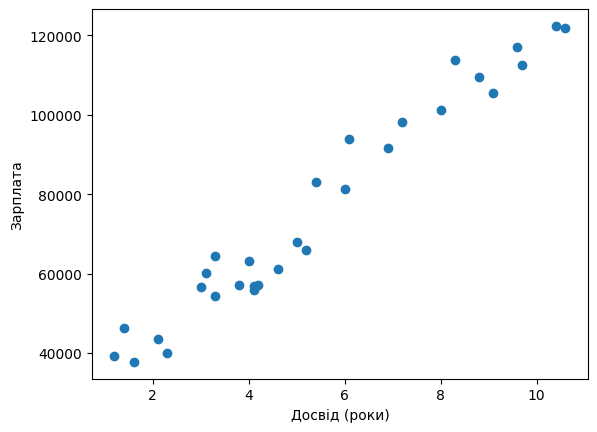

In [5]:
# Візуалізація Досвіду роботи до зарплати
plt.scatter(data_origin["YearsExperience"], data_origin["Salary"]) 
plt.xlabel("Досвід (роки)")
plt.ylabel("Зарплата")

In [43]:
# Виділення координат у numpy масив для зручності
X = data_origin["YearsExperience"].values.reshape(-1,1)
Y = data_origin["Salary"].values.reshape(-1,1)

In [44]:
# Обчислення середніх значень
x_mean = np.mean(X)
y_mean = np.mean(Y)

In [45]:
# Розділення вибірки на тренувальну та валідаційну (30% — CV)
from sklearn.model_selection import train_test_split
X_train, X_cv, y_train, y_cv = train_test_split(
    X, Y, test_size=0.3, random_state=143
)

print("Train size:", X_train.shape[0])
print("CV size:", X_cv.shape[0])

Train size: 21
CV size: 9


In [46]:
#   Обчислення коефіцієнтів лінійної регресії
# Формули: a = sum((x - mean_x)*(y - mean_y)) / sum((x - mean_x)^2)
#          b = mean_y - a * mean_x
a = np.sum((X - x_mean) * (Y - y_mean)) / np.sum((X - x_mean)**2)
a

9449.962321455076

In [47]:
# Формула для вільного члена b:
#   b = ȳ - a * x̄
b = y_mean - a * x_mean
b

24848.2039665232

In [48]:
#Побудова регресійної прямої
# Задаємо діапазон x для побудови прямої
x_range = np.linspace(X.min(), X.max(), 30)
y_pred = a * x_range + b  # прогнозовані значення

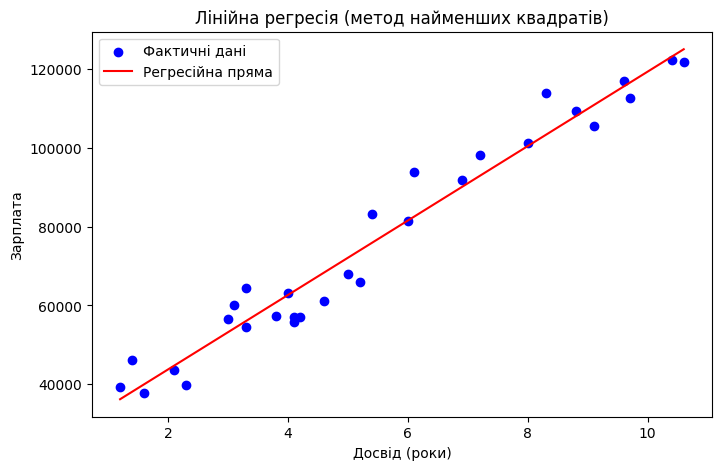

In [49]:
# Візуалізація
plt.figure(figsize=(8,5))
plt.scatter(X, Y, color="blue", label="Фактичні дані")   # точки з датасету
plt.plot(x_range, y_pred, color="red", label="Регресійна пряма")  # лінія
plt.xlabel("Досвід (роки)")
plt.ylabel("Зарплата")
plt.title("Лінійна регресія (метод найменших квадратів)")
plt.legend()

## Лінійна регресія з допомогою sklearn

In [50]:
# Підлючення потрібного інстументарію
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [51]:
# Дані для роботи з sklearn
X1 = data_origin[["YearsExperience"]]
Y2 = data_origin["Salary"]

In [52]:
# Лінійна регресія через sklearn
model = LinearRegression()
model.fit(X1, Y2)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [53]:
# Прогноз
x_range1 = pd.DataFrame(np.linspace(X1.min(), X1.max(), 30), columns=["YearsExperience"])
y_pred1 = model.predict(x_range1)

In [59]:
# Перевірка перших передбачень
some_data = X_train[:5]
some_labels = y_train[:5]

# Робимо DataFrame, щоб відповідало навчанню
some_data_df = pd.DataFrame(some_data, columns=["YearsExperience"])

print("Predictions:\n", model.predict(some_data_df))
print("Labels:\n", some_labels)

# Перетворюємо X_train назад у DataFrame з назвою колонки
X_train_df = pd.DataFrame(X_train, columns=["YearsExperience"])
train_predictions = model.predict(X_train_df)

# RMSE
train_mse = mean_squared_error(y_train, train_predictions)
train_rmse = np.sqrt(train_mse)
print("Train RMSE =", train_rmse)


Predictions:
 [ 46583.11730587  63593.04948449  53198.09093089 116512.83848464
  82492.9741274 ]
Labels:
 [[ 39892.]
 [ 55795.]
 [ 56643.]
 [112636.]
 [ 93941.]]
Train RMSE = 5522.9606803010565


In [55]:
# Перевірка моделі на всьому датасеті
X_test = pd.DataFrame(data_origin["YearsExperience"], columns=["YearsExperience"])
y_test = data_origin["Salary"]

final_predictions = model.predict(X_test)

final_mse = mean_squared_error(y_test, final_predictions)

final_rmse = np.sqrt(final_mse)

print("Final Test RMSE =", final_rmse)

Final Test RMSE = 5592.043608760661


In [56]:
# коефіцієнт детермінації
score = r2_score(y_test, final_predictions)
print("R² score =", score)

R² score = 0.9569566641435086


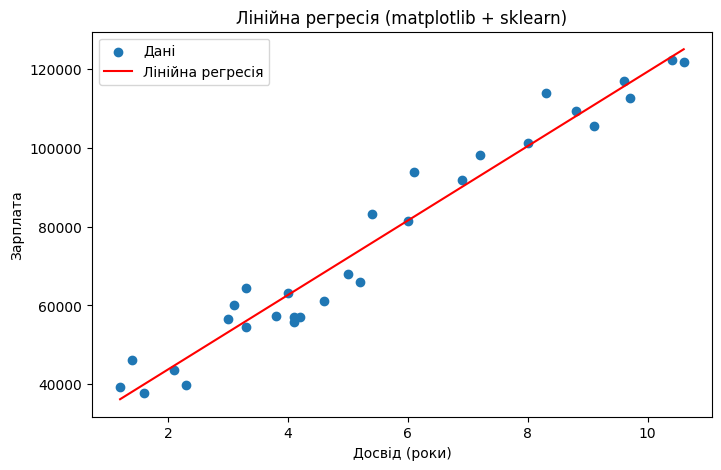

In [57]:
plt.figure(figsize=(8,5))
plt.scatter(X1, Y2, label="Дані")
plt.plot(x_range1, y_pred1, color="red", label="Лінійна регресія")
plt.xlabel("Досвід (роки)")
plt.ylabel("Зарплата")
plt.title("Лінійна регресія (matplotlib + sklearn)")
plt.legend()